# Michelin data analysis project  (date: 2023.4.26) 
<ins>**by Xinzhao Mu**</ins> 

In this notebook is simply about the performing analysis related to some supplier data.

Overall, there are 3 xlsx data files provided:
[Original Raw Data:](https://docs.google.com/spreadsheets/d/18GK7B3EE5oWCnZyJELHsHXrpgRb04XJy/edit?usp=sharing&ouid=113957770953516499511&rtpof=true&sd=true)
[]("https://docs.google.com/spreadsheets/d/18GK7B3EE5oWCnZyJELHsHXrpgRb04XJy/edit?usp=sharing&ouid=113957770953516499511&rtpof=true&sd=true")
1-	Quality data
2-	Spend data
3-	Delivery data


**My Designed Steps:**

1 - Loading and preprocessing


2 - Data analysis: Gain supplier performance insights


3 - Conclusion and suggestion


## 1 - loading and preprocessing
---



In [ ]:
# import needed pkgs
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read three excel table separately as dataframes
delivery=pd.read_excel('interview dataset_2023.xlsx', sheet_name='Deliveries')
quality=pd.read_excel('interview dataset_2023.xlsx', sheet_name='Quality')
spend=pd.read_excel('interview dataset_2023.xlsx', sheet_name='SPENDS')

### **delivery data sheet**


---



In [ ]:
# check the overall insight of columns
delivery.head()


,Unnamed: 0,Vendor,Unnamed: 2,Unnamed: 3,Material,Scheduled Date,Date Received,Corr. Date Reliability,Scheduled Quantity,Quantity Received,Corr. Qty. Reliability
0,NaN,076EU,NaN,NaN,PIDEU1063,2023-02-01,2023-03-31,1,10.0,10.0,100
1,NaN,076EU,NaN,NaN,PIDEU102L,2023-02-01,2023-03-31,1,10.0,10.0,100
2,NaN,228IB,NaN,NaN,PIDIB3006,2022-08-22,2023-03-31,1,2.0,2.0,100
3,NaN,578GL,NaN,NaN,PIDGL1058,2023-01-19,2023-03-31,73,1225.0,1225.0,73
4,NaN,578GL,NaN,NaN,PIDGL1058,2023-02-16,2023-03-31,73,1225.0,1225.0,73


In [ ]:
# dropping unnamed columns and making it looks tidy
delivery.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3'], axis=1, inplace=True)

In [ ]:
# dropping duplicates
delivery.drop_duplicates(inplace=True)

In [ ]:
delivery.head()

,Vendor,Material,Scheduled Date,Date Received,Corr. Date Reliability,Scheduled Quantity,Quantity Received,Corr. Qty. Reliability
0,076EU,PIDEU1063,2023-02-01,2023-03-31,1,10.0,10.0,100
1,076EU,PIDEU102L,2023-02-01,2023-03-31,1,10.0,10.0,100
2,228IB,PIDIB3006,2022-08-22,2023-03-31,1,2.0,2.0,100
3,578GL,PIDGL1058,2023-01-19,2023-03-31,73,1225.0,1225.0,73
4,578GL,PIDGL1058,2023-02-16,2023-03-31,73,1225.0,1225.0,73


In [ ]:
delivery.info() #calling info function for double checking the datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12190 entries, 0 to 13145
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Vendor                  12190 non-null  object        
 1   Material                12190 non-null  object        
 2   Scheduled Date          12190 non-null  datetime64[ns]
 3   Date Received           12190 non-null  datetime64[ns]
 4   Corr. Date Reliability  12190 non-null  int64         
 5   Scheduled Quantity      12190 non-null  float64       
 6   Quantity Received       12190 non-null  float64       
 7   Corr. Qty. Reliability  12190 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 857.1+ KB


In [ ]:
#check Null values
delivery.isnull().any()

Vendor                    False
Material                  False
Scheduled Date            False
Date Received             False
Corr. Date Reliability    False
Scheduled Quantity        False
Quantity Received         False
Corr. Qty. Reliability    False
dtype: bool

### **quality data sheet**

---



In [ ]:
quality.head()

,Unnamed: 0,SQI-ID,SQI Status,Unnamed: 3,Vendor,Issue State,Unnamed: 6,Material,Unnamed: 8,Part description,...,Date originated,Due date,ZDFlag,Unnamed: 14,Unnamed: 15,Qty Lot,Qty Rejects,Unit,NC CoPQ,CoPQ Rec.
0,NaN,2023 - 3424,Late,NaN,691AC,Recurrence,NaN,PIDAC95B3,NaN,Tubeless Wheel,...,2023-03-07,2023-03-28 04:00:00,NaN,NaN,NaN,46.0,NaN,PC,0.0,0.0
1,NaN,2023 - 3425,Late,NaN,636JA,Recurrence,NaN,PIDJa9585,NaN,Tubeless Wheel,...,2023-03-07,2023-03-28 04:00:00,NaN,NaN,NaN,1.0,NaN,PC,0.0,0.0
2,NaN,2023 - 3426,Late,NaN,636JA,Recurrence,NaN,PIDJa9585,NaN,Tubeless Wheel,...,2023-03-07,2023-03-28 04:00:00,NaN,NaN,NaN,8.0,NaN,PC,0.0,0.0
3,NaN,2023 - 3427,Late,NaN,636JA,Recurrence,NaN,PIDJa9585,NaN,Tubeless Wheel,...,2023-03-07,2023-03-28 04:00:00,NaN,NaN,NaN,2.0,NaN,PC,0.0,0.0
4,NaN,2023 - 3428,Late,NaN,636JA,Recurrence,NaN,PIDJa9585,NaN,Tubeless Wheel,...,2023-03-07,2023-03-28 04:00:00,NaN,NaN,NaN,2.0,NaN,PC,0.0,0.0


In [ ]:
quality.drop(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)

In [ ]:
# dropping duplicates
quality.drop_duplicates(inplace=True)

In [ ]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SQI-ID               234 non-null    object        
 1   SQI Status           234 non-null    object        
 2   Vendor               234 non-null    object        
 3   Issue State          234 non-null    object        
 4   Material             234 non-null    object        
 5   Part description     234 non-null    object        
 6   Problem Description  234 non-null    object        
 7   Date originated      234 non-null    datetime64[ns]
 8   Due date             234 non-null    datetime64[ns]
 9   ZDFlag               59 non-null     object        
 10  Qty Lot              234 non-null    float64       
 11  Qty Rejects          51 non-null     float64       
 12  Unit                 234 non-null    object        
 13  NC CoPQ              234 non-null  

In [ ]:
print(quality['ZDFlag'].isnull().sum())
print(quality['Qty Rejects'].isnull().sum())

175
183


In [ ]:
#check Null values
quality.isnull().any()
"""
From the information, we can see that there are many missing values in the selfdefined column ZDFlag. 
However, because I am unsure of the meaning of this column and the large number of missing values, 
deleting them directly would have a significant impact on the data. Therefore, these missing values will be temporarily retained. 
But for the missing values in Quantity reject, they should be filled with 0 according to the meaning of this cloumn.
"""

'\nFrom the information, we can see that there are many missing values in the customized column ZDFlag. \nHowever, because I am unsure of the meaning of this column and the large number of missing values, \ndeleting them directly would have a significant impact on the data. Therefore, these missing values will be temporarily retained. \nFor the missing values in Qty reject, they should be filled with 0 according to the meaning of this cloumn.\n'

In [ ]:

quality['Qty Rejects'].fillna(value=0, inplace=True)
quality['Qty Rejects'].isnull().sum() # double check it, make sure null value has been filled succuessfully

0

### **spend data sheet**

---



In [ ]:
spend.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Vendor Name,Spend US$
0,NaN,NaN,NaN,345AM,521491.602837
1,NaN,NaN,NaN,407AI,230328.456895
2,NaN,NaN,NaN,812BE,109865.366720
3,NaN,NaN,NaN,386QU,108931.091514
4,NaN,NaN,NaN,902G,89561.474727


In [ ]:
spend.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1, inplace=True)

In [ ]:
# dropping duplicates
spend.drop_duplicates(inplace=True)

In [ ]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vendor Name  203 non-null    object 
 1   Spend US$    203 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
#check Null values
spend.isnull().any()

Vendor Name    False
Spend US$      False
dtype: bool


## 2 - Data analysis:Gain supplier performance insights
---


### **delivery data sheet**

1.Top 10 vendors with the most differences on delivered quantity  
2.Top 10 vendors with the smallest differences on delivered quantity  
3.The most popular 10 vendors and materials  
4.The most unpunctual top10 vendors  
5.Monitoring trends of each month  

---

        Scheduled Quantity  Quantity Received  Quantity Difference
Vendor                                                            
345AM         1.056513e+07        5633680.204          4931449.728
204VI         6.400142e+06        5151871.000          1248271.000
216PL         2.472800e+06        1448426.340          1024373.660
407AI         3.180213e+06        2463448.900           716764.520
324PU         6.000000e+05         245000.000           355000.000
383LE         2.829850e+06        2479325.000           350525.000
642AR         1.432440e+06        1262020.000           170420.000
034BA         8.400000e+05         680000.000           160000.000
226K          1.500000e+05          12010.000           137990.000
616HI         7.898000e+05         677600.000           112200.000


<ipython-input-21-8753947c7646>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]


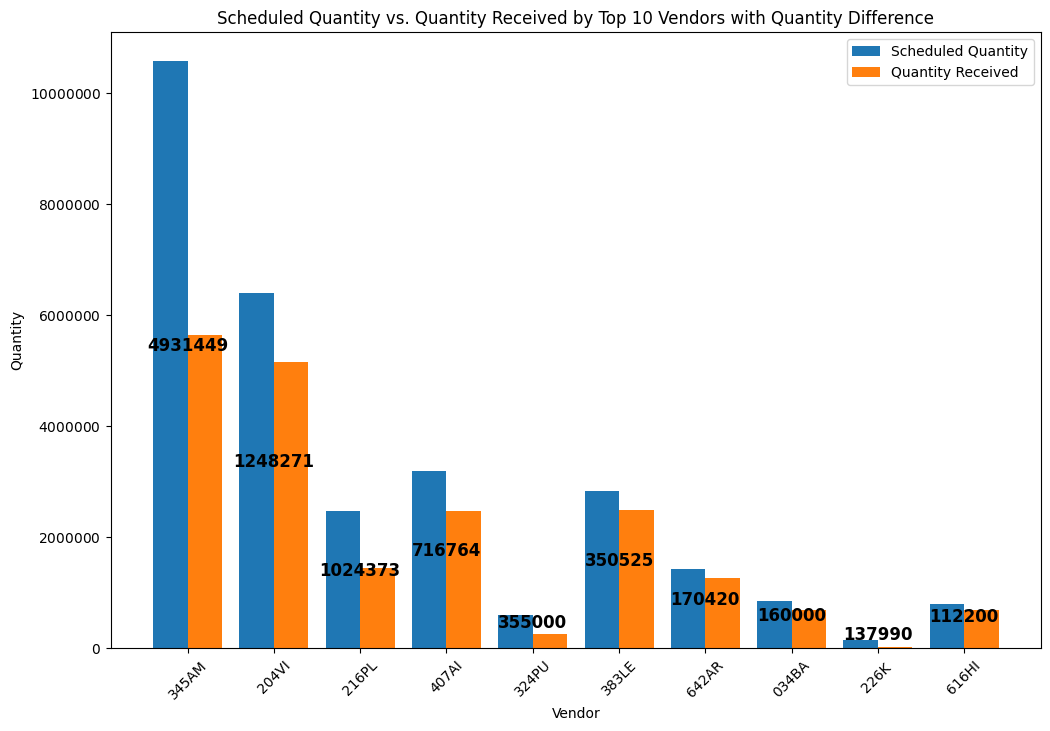

In [ ]:
# print top 10 diff between Quantity Scheduled and received based on each supplier and then do the visulization

from matplotlib.ticker import ScalarFormatter
grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]


grouped_df['Quantity Difference'] = grouped_df['Scheduled Quantity'] - grouped_df['Quantity Received']
grouped_df = grouped_df.sort_values('Quantity Difference', ascending=False).head(10)
print(grouped_df)

x = np.arange(len(grouped_df.index))
width = 0.4
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x-0.2, grouped_df['Scheduled Quantity'], width, label='Scheduled Quantity')
ax.bar(x+0.2, grouped_df['Quantity Received'], width, label='Quantity Received')
# adding diff in plain text in between
# looping index and value together
for i, (sched_val, recv_val) in enumerate(zip(grouped_df['Scheduled Quantity'], grouped_df['Quantity Received'])):
    diff = sched_val - recv_val
    if diff >= 0:
        offset = 50
    else:
        offset = -50
    ax.text(i, sched_val//2, int(diff), ha='center', va='bottom', fontweight='bold', fontsize=12)

# labeling
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.set_xlabel('Vendor')
ax.set_ylabel('Quantity')
ax.set_title('Scheduled Quantity vs. Quantity Received by Top 10 Vendors with Most Difference')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-22-e7bdcb72c352>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]


        Scheduled Quantity  Quantity Received  Quantity Difference
Vendor                                                            
032AG             170010.0           320010.0            -150000.0
264PH            1125000.0          1191000.0             -66000.0
795MA              84000.0           144000.0             -60000.0
076D              385043.0           440073.0             -55030.0
150SK             968000.0           999000.0             -31000.0
241NI              82497.0           106545.0             -24048.0
515ES              40000.0            60000.0             -20000.0
095LA              64000.0            80000.0             -16000.0
475IS             863000.0           869300.0              -6300.0
514IN               6000.0            12000.0              -6000.0


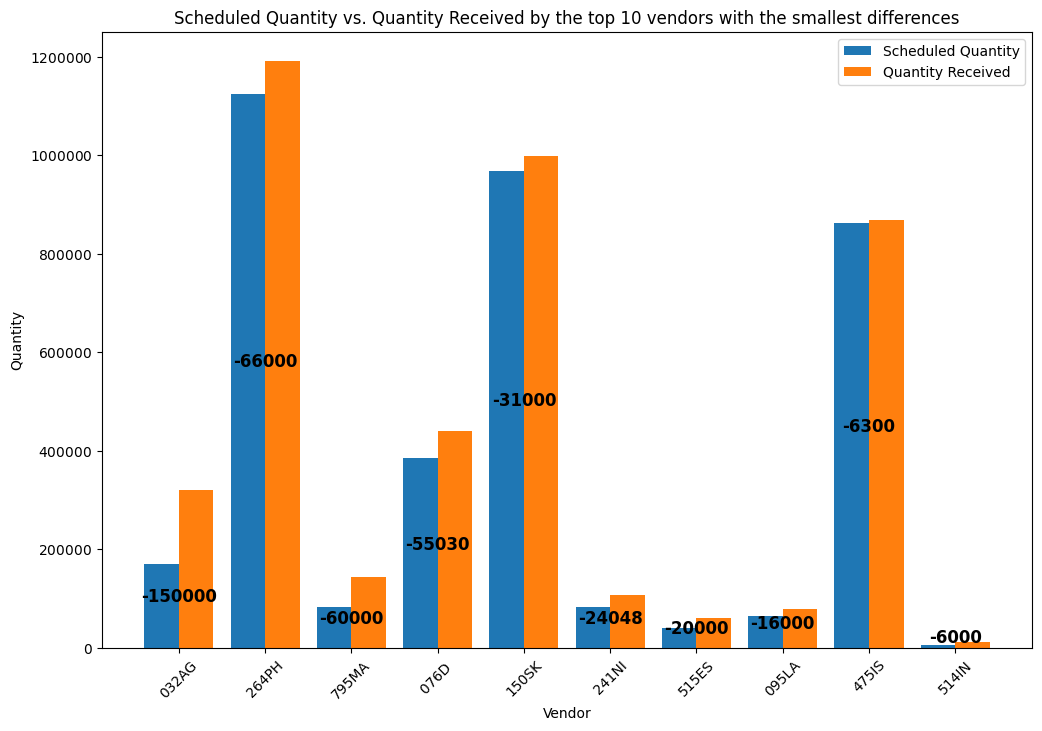

'\nAccording to the chart, it can be seen that there are some vendors which actually delivered more than expected, \nindicating that there may be some backlogs or historical orders that need to be investigated in detail\n'

In [ ]:
# with the same logic, finding the top 10 vendors with the smallest differences

grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]

# print top 10 diff between Quantity Scheduled and received based on each Vendor
grouped_df['Quantity Difference'] = grouped_df['Scheduled Quantity'] - grouped_df['Quantity Received']
grouped_df = grouped_df.sort_values('Quantity Difference', ascending=True).head(10)
print(grouped_df)

x = np.arange(len(grouped_df.index))
width = 0.4
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x-0.2, grouped_df['Scheduled Quantity'], width, label='Scheduled Quantity')
ax.bar(x+0.2, grouped_df['Quantity Received'], width, label='Quantity Received')
# adding diff in plain text in between
# looping index and value together
for i, (sched_val, recv_val) in enumerate(zip(grouped_df['Scheduled Quantity'], grouped_df['Quantity Received'])):
    diff = sched_val - recv_val
    if diff >= 0:
        offset = 50
    else:
        offset = -50
    ax.text(i, sched_val//2, int(diff), ha='center', va='bottom', fontweight='bold', fontsize=12)

# labeling
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.set_xlabel('Vendor')
ax.set_ylabel('Quantity')
ax.set_title('Scheduled Quantity vs. Quantity Received by the top 10 vendors with the smallest differences')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

"""
According to the chart, it can be seen that there are some vendors which actually delivered more than expected, 
indicating that there may be some backlogs or historical orders that need to be investigated in detail
"""

In [ ]:
# summrizing the on demand suppliers and over delivered suppliers: 
grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]

grouped_df['Quantity Difference'] = grouped_df['Scheduled Quantity'] - grouped_df['Quantity Received']
print('Vendor delivered on demand:')
print(grouped_df.sort_values('Quantity Difference', ascending=True)[grouped_df['Quantity Difference']==0].index)

print('Vendor delivered more than demand:') # something happened
print(grouped_df.sort_values('Quantity Difference', ascending=True)[grouped_df['Quantity Difference']<0].index)

Vendor delivered on demand:
Index(['234TE', '225TE', '549BI', '237NE', '570PO', '590QU', '207WU', '207PP',
       '600CA', '204O.', '680LO', '544S ', '444BO', '230MU', '242CO', '265GO',
       '251ZF', '460SA', '432BA', '398SA', '478MY', '500FU', '502RE', '361UG',
       '338NU', '517RI', '521NI', '537AM', '983PL', '300CA', '293MI', '292TE',
       '524RO', '287SU', '285VA', '284CT', '277PU', '684CH', '254IO', '307SI',
       '195RU', '310SC', '192LA', '834SA', '859OU', '122UN', '953db', '115CH',
       '111ME', '194CA', '093GO', '092ID', '087ZH', '879BR', '950G,', '886MP',
       '080CZ', '079TR', '078EL', '888SU', '889GA', '915HY', '067NO', '923LA',
       '148He', '0662 ', '156HY', '978CH', '700LA', '032ME', '183CH', '182LA',
       '710EX', '731AD', '733C ', '955GI', '173CO', '173JO', '981PL', '039Mc',
       '172D.', '044SC', '046RE', '773PO', '168BE', '163TA', '162NO'],
      dtype='object', name='Vendor')
Vendor delivered more than demand:
Index(['032AG', '264PH', '795MA', '076D

<ipython-input-23-262d741edc84>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = delivery.groupby('Vendor').sum()[['Scheduled Quantity', 'Quantity Received']]
<ipython-input-23-262d741edc84>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(grouped_df.sort_values('Quantity Difference', ascending=True)[grouped_df['Quantity Difference']==0].index)
<ipython-input-23-262d741edc84>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(grouped_df.sort_values('Quantity Difference', ascending=True)[grouped_df['Quantity Difference']<0].index)


In [ ]:
# Sum by Vendor and sort by Scheduled Quantity to find the top 10 most needed Vendors
top10_vendor = delivery.groupby('Vendor').sum().sort_values('Scheduled Quantity', ascending=False).head(10).index

# Sum by Vendor and sort by Scheduled Quantity to find the top 10 most needed Materials
top10_material = delivery.groupby('Material').sum().sort_values('Scheduled Quantity', ascending=False).head(10).index

print('Top 10 Vendors by Order Quantity:')
print(top10_vendor)

print('\nTop 10 Materials by Order Quantity:')
print(top10_material)

Top 10 Vendors by Order Quantity:
Index(['345AM', '204VI', '407AI', '383LE', '216PL', '361UG', '171J ', '642AR',
       '812BE', '264PH'],
      dtype='object', name='Vendor')

Top 10 Materials by Order Quantity:
Index(['PIDAM0N33', 'PIDVI127P', 'PIDAM0N12', 'PIDVI123P', 'PIDUGRD0A',
       'PIDLEROWF', 'PIDPL1936', 'PIDAM9S80', 'PIDAI5478', 'PIDBARB22'],
      dtype='object', name='Material')


<ipython-input-24-8bdee3770474>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_vendor = delivery.groupby('Vendor').sum().sort_values('Scheduled Quantity', ascending=False).head(10).index
<ipython-input-24-8bdee3770474>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_material = delivery.groupby('Material').sum().sort_values('Scheduled Quantity', ascending=False).head(10).index


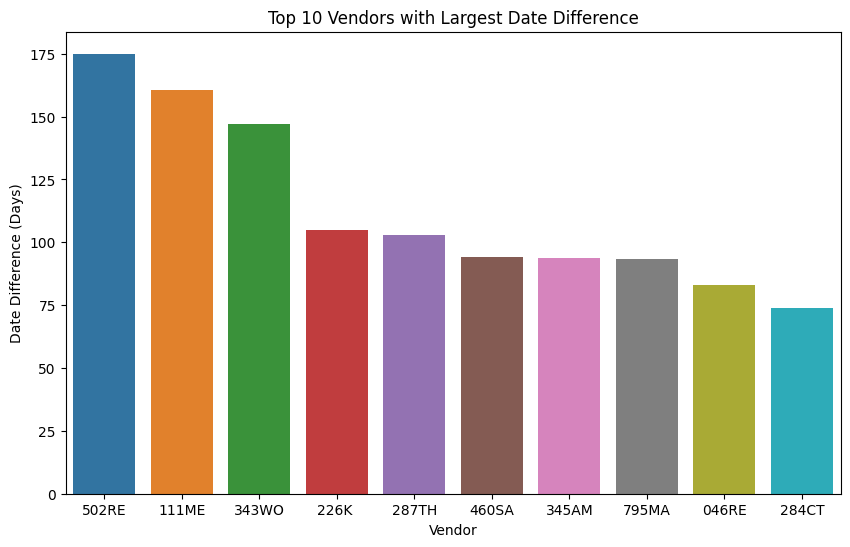

In [ ]:
# Jumping here the analysis of Date!
# Calculate the number of days of difference between scheduled Date and Date Received	
delivery['Date Difference'] = (delivery['Date Received'] - delivery['Scheduled Date']).dt.days

# group by vendor
grouped_df = delivery.groupby('Vendor')['Date Difference'].mean().reset_index()

# filtering out top 10
top10_vendors = grouped_df.sort_values('Date Difference', ascending=False).head(10)


# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Vendor', y='Date Difference', data=top10_vendors)
plt.xlabel('Vendor')
plt.ylabel('Date Difference (Days)')
plt.title('Top 10 Vendors with Largest Date Difference')
plt.show()

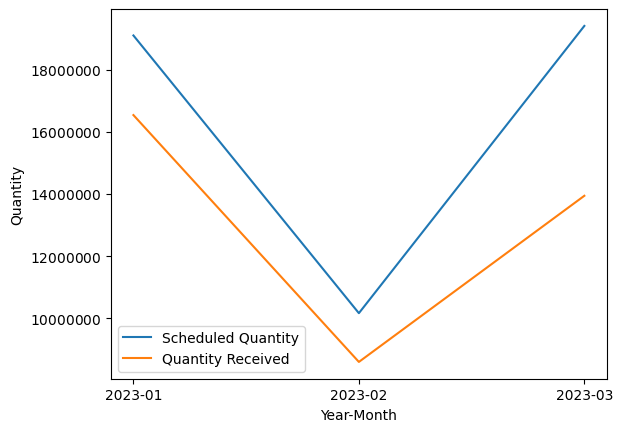

In [ ]:

# Finally performing the monitoring of the each month quantitiy (Date Received)
delivery['Year-Month'] = delivery['Date Received'].dt.strftime('%Y-%m')


# Group by Year-Month and Scheduled Quantity to calculate the total number of expected orders for each month
scheduled_df = delivery.groupby('Year-Month')['Scheduled Quantity'].sum()

# Group by Year-Month and Scheduled Quantity to calculate the total number of actual orders for each month
received_df = delivery.groupby('Year-Month')['Quantity Received'].sum()

# merging together
merged_df = pd.merge(scheduled_df, received_df, on='Year-Month', how='outer')

# line plot
ax=sns.lineplot(x='Year-Month', y='Scheduled Quantity', data=merged_df, label='Scheduled Quantity')
ax=sns.lineplot(x='Year-Month', y='Quantity Received', data=merged_df, label='Quantity Received')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.ylabel('Quantity')
plt.show()

### **quality data sheet**

1.The distribution of SQI Status to understand the quality of the supply chain   
2.NC CoPQ and CoPQ Rec. comparison for each vendor   
3.NC CoPQ and CoPQ Rec. comparison for each Material   
4.Count the words that appear most frequently     

---

In [ ]:
quality['Problem Description'].value_counts().head(10) # the relative common problems encountered

Porosity      30
Skim damag    13
Tool mark     13
CSK oval      13
Marking ou    12
Nave Damag    11
Paint dama     6
LUMPY RUBB     6
Corrosion      5
Wheel dama     5
Name: Problem Description, dtype: int64

In [ ]:
quality['Part description'].value_counts().head(10) # the relative common parts encountered

Tubeless Wheel       86
Cast Wheel           77
slab rubber          10
Braket                6
Track                 4
Prelug                3
Sproket               2
Front Bracket kit     2
Rear braket kit       2
REAR BRACKET KIT      2
Name: Part description, dtype: int64

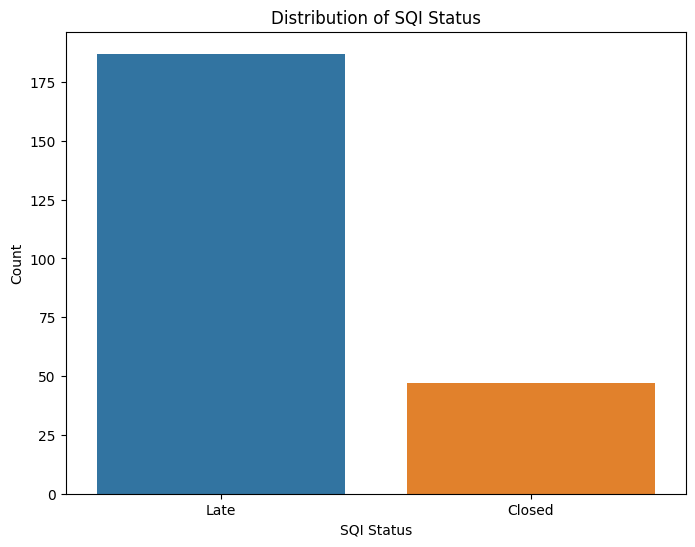

In [ ]:
# Analyzing the SQI status 
status_count = quality['SQI Status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=status_count.index, y=status_count.values)
plt.title('Distribution of SQI Status')
plt.xlabel('SQI Status')
plt.ylabel('Count')
plt.show()


<ipython-input-30-d6e1f12e741f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendor_data = quality.groupby('Vendor')['NC CoPQ', 'CoPQ Rec.'].sum()


           NC CoPQ  CoPQ Rec.
Vendor                       
083LE    1500360.0        0.0
100CA     255000.0        0.0
185HY     603376.0   603376.0
203GE    1848916.0  1848916.0
345AM    1736360.0        0.0
380EI    1178110.0  1178110.0
386QU     100000.0        0.0
388LE      60000.0        0.0
407AI     436800.0        0.0
468PP      50000.0        0.0
516XI          0.0        0.0
521NI     250000.0        0.0
537AM      50000.0        0.0
577FA      50000.0        0.0
578GL   11970924.0        0.0
601FA          0.0        0.0
602ES     460000.0        0.0
636JA          0.0        0.0
660OT          0.0        0.0
666SH          0.0        0.0
691AC          0.0        0.0
769SB      50000.0        0.0
801AT     100000.0        0.0
850CA     200000.0        0.0
859OU      50000.0        0.0
902G&    1638406.0  1638406.0
962WA    5282730.0  5282730.0


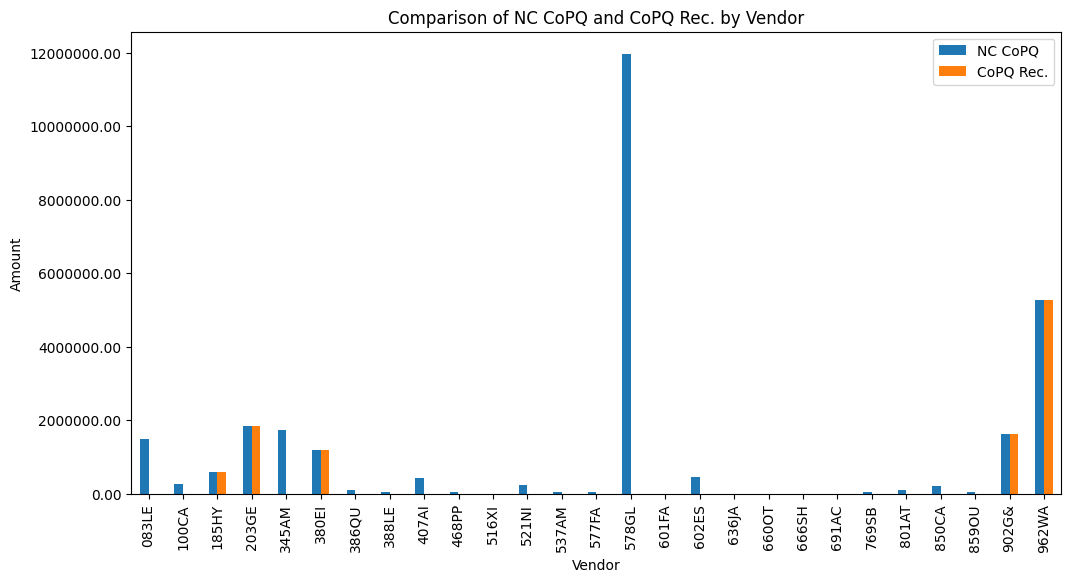

In [ ]:
# analyzing the CoPQ on each suppliers

import matplotlib.ticker as ticker
vendor_data = quality.groupby('Vendor')['NC CoPQ', 'CoPQ Rec.'].sum()
vendor_data.sort_values(by='NC CoPQ', inplace=False)
print(vendor_data)
ax = vendor_data.plot(kind='bar', figsize=(12, 6)) 
ax.set_title('Comparison of NC CoPQ and CoPQ Rec. by Vendor')
ax.set_xlabel('Vendor')
ax.set_ylabel('Amount')
ax.legend(loc='upper right')
formatter = ticker.FormatStrFormatter('%.2f') 
ax.yaxis.set_major_formatter(formatter)
plt.show()

<ipython-input-31-0bfcb7fa92f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  material_data = quality.groupby('Material')['NC CoPQ', 'CoPQ Rec.'].sum()


              NC CoPQ  CoPQ Rec.
Material                        
PIDHY2C99     18716.0    18716.0
PIDAI60al     36800.0        0.0
PIDES1081     50000.0        0.0
PIDES1060     50000.0        0.0
PIDES1078     50000.0        0.0
PIDES108)     50000.0        0.0
PIDSB1011     50000.0        0.0
PIDES1089     50000.0        0.0
PIDES1090     50000.0        0.0
PIDFA1007     50000.0        0.0
PIDNI4058     50000.0        0.0
PIDNI4045     50000.0        0.0
PIDNI4040     50000.0        0.0
PIDNI4038     50000.0        0.0
PIDNI1008     50000.0        0.0
PIDES1010     50000.0        0.0
PIDOU1053     50000.0        0.0
PIDES1020     50000.0        0.0
PIDAT1002     50000.0        0.0
PIDCA1078     50000.0        0.0
PIDPP1020     50000.0        0.0
PIDCA1059     50000.0        0.0
PIDAM1022     50000.0        0.0
PIDCA1030     50000.0        0.0
PIDCA1026     50000.0        0.0
PIDCA1017     50000.0        0.0
PIDCA1016     50000.0        0.0
PIDAT1012     50000.0        0.0
PIDCA10x) 

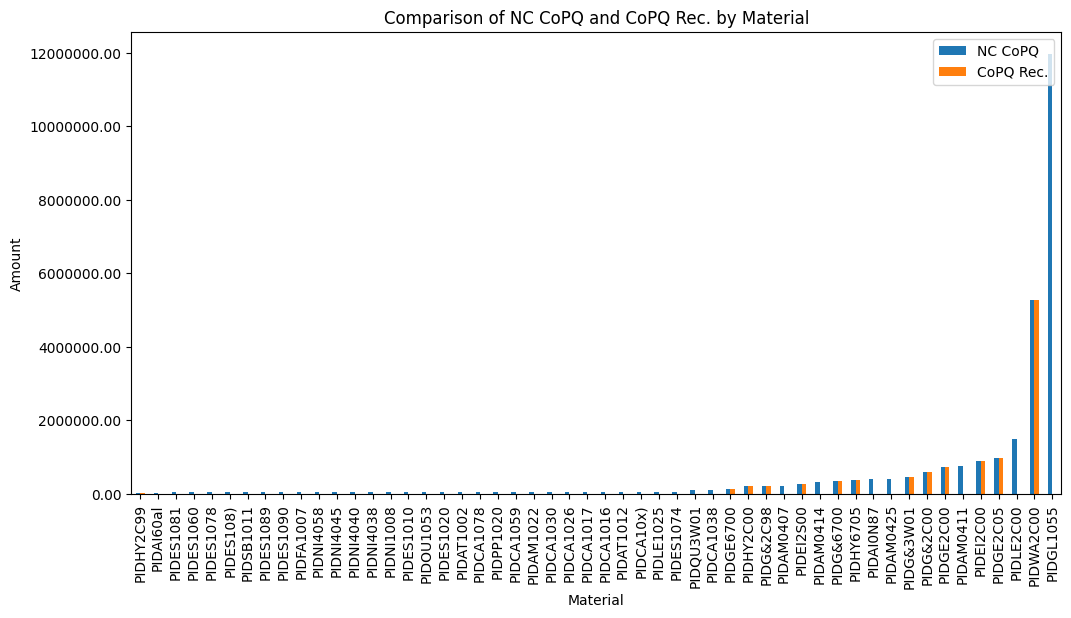

In [ ]:
# NC CoPQ and CoPQ Rec. comparison for each Material
material_data = quality.groupby('Material')['NC CoPQ', 'CoPQ Rec.'].sum()
material_data=material_data[material_data['NC CoPQ']!=0].sort_values(by='NC CoPQ', inplace=False)
print(material_data)
ax=material_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of NC CoPQ and CoPQ Rec. by Material')
plt.xlabel('Material')
plt.ylabel('Amount')
plt.legend(loc='upper right')
formatter = ticker.FormatStrFormatter('%.2f') 
ax.yaxis.set_major_formatter(formatter)
plt.show()


In [ ]:
#NLP for desciption column built up the word cloud for visulization purpose
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
# Convert to lowercase letters, removing punctuation and stop words
stop_words = set(stopwords.words('english'))
quality['Problem Description'] = quality['Problem Description'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.isalpha() and word.lower() not in stop_words]))

# Count the words that appear most frequently
word_counts = Counter(' '.join(quality['Problem Description']).split())
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('porosity', 30), ('damag', 29), ('csk', 17), ('tool', 16), ('skim', 14), ('oval', 13), ('mark', 13), ('nave', 12), ('marking', 12), ('ou', 12)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


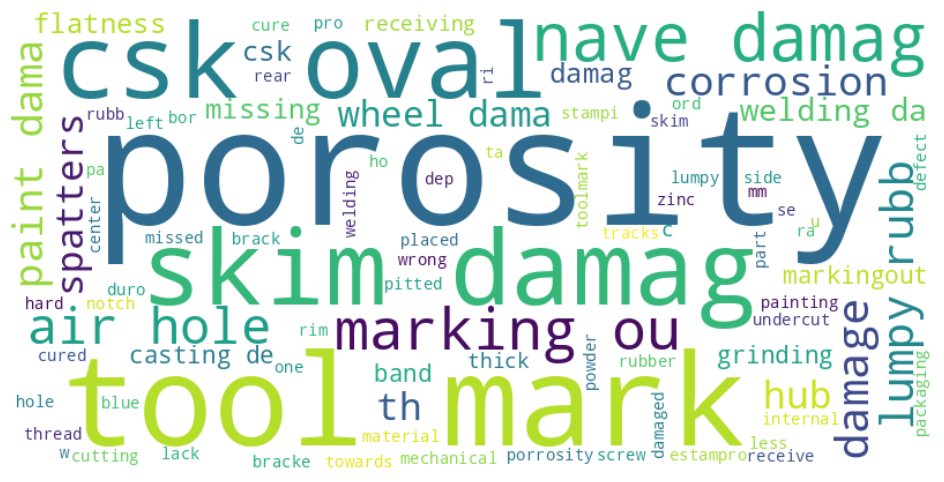

In [ ]:

# word cloud plotting: bigger size of text, the bigger issue we have on this type of problem
from wordcloud import WordCloud
text = quality['Problem Description'].str.cat(sep=' ')
text = text.lower()  

wc = WordCloud(width=800, height=400, background_color='white', max_words=100)

wordcloud = wc.generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Spend data sheet**

   

---

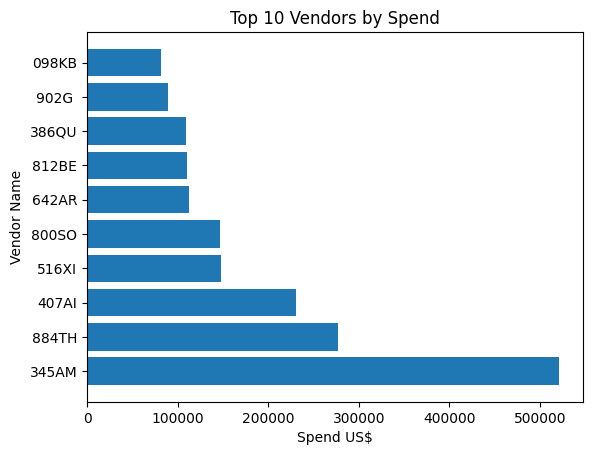

In [ ]:
# Sort and select the top ten suppliers that we spent the most at
vendor_spend = spend.groupby('Vendor Name')['Spend US$'].sum().reset_index()


top_vendors = vendor_spend.sort_values('Spend US$', ascending=False).head(10)

plt.barh(top_vendors['Vendor Name'], top_vendors['Spend US$'])
plt.xlabel('Spend US$')
plt.ylabel('Vendor Name')
plt.title('Top 10 Vendors by Spend')
plt.show()

Vendor Name
345AM     5.214916e+05
884TH     2.775334e+05
407AI     2.303285e+05
516XI     1.481818e+05
800SO     1.470837e+05
Others    3.558708e+06
Name: Spend US$, dtype: float64


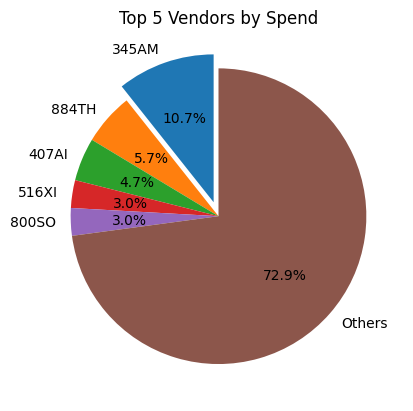

In [ ]:

# Calculate the spend proportion for each supplier
vendor_spend = spend.groupby('Vendor Name')['Spend US$'].sum()


top_vendor_spend = vendor_spend.nlargest(5)


other_vendor_spend = vendor_spend.sum() - top_vendor_spend.sum()

top_vendor_spend['Others'] = other_vendor_spend
print(top_vendor_spend)

explode = (0.1, 0, 0, 0, 0,0)


plt.pie(top_vendor_spend, labels=top_vendor_spend.index, explode=explode, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Vendors by Spend')

plt.show()

[ 6063.31210242 10770.45677269 20841.54216703]


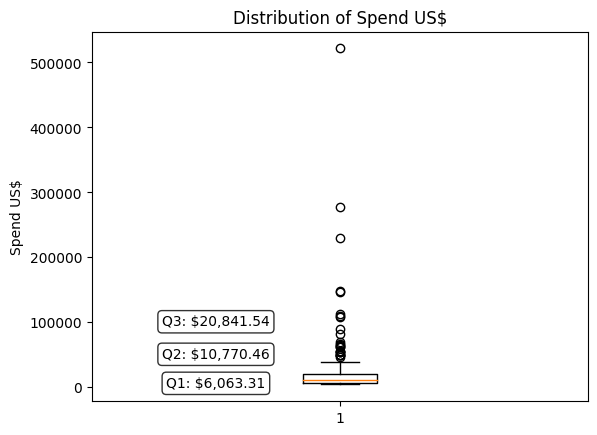

In [ ]:
# Distribution of Spend US$ viewing by boxplot
quantiles = np.percentile(spend['Spend US$'], [25, 50, 75])
print(quantiles)
fig, ax = plt.subplots()
ax.boxplot(spend['Spend US$'], showfliers=True)

for i, q in enumerate(quantiles):
    ax.annotate('Q{}: ${:,.2f}'.format(i+1, q), xy=(0.75, q+i*40000),
                ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.title('Distribution of Spend US$')
plt.ylabel('Spend US$')
plt.show()


## 3 - Conclusion and suggestion
---



**delivery table**  

---



---


From analyzing the delivery table, we can identify the top 10 suppliers who have the most gaps between the delivery volume and expectations, which require close monitoring in future transactions. Specifically, vendors named 345AM and 204VI, with a large number of scheduled orders but only half the actual received volume, that needs to require attention. 
Additionally, there are some cases that actual quantity exceeding the expected amount shown in the statistical table and require annotation during statistical analysis, such as identifying reasons for backlog orders from the previous quarter or other factors. This recording facilitates later analysis and statistics.

Furthermore, by analyzing the dates revealed the top 10 vendors with the longest delays, among which three vendors had delays exceeding 5 months, significantly impacting production.

Fianlly, It seems we cannot always received the order with correct Scheduled Quantity, particularly in March this year, where the gap increased significantly compared to previous periods. This is also a red flag requires serious attention.



**quality table**  

---


The quality table contains a lot of information about product quality. Through simple analysis, we could first identified the top 10 most common product quality problems and their locations of parts, which are worth paying attention to. In particular, porosity, which may be caused by casting, has a significant impact on our main tire production. 
Secondly, by analyzing the SQI revealed that lateness still accounts for a significant proportion, indicating that many issues have not been resolved and most are recurrent. Additionally, analyzing the cost of poor quality shows that it has added-on costs to the company, especially NC costs, which may include production reprocessing costs, scrap costs, quality inspection costs, and after-sales service costs. Especailly, Supplier named 578GL needs special attention as its value has reached a staggering about 12 million.

Furthermore, by analyzing specific problematic materials, we found that this was caused by named PIDGL1055, which belongs to frame parts, and the related issue reported is packaging. 

Moreover, I introduced an interesting visual model by using simple natural language processing methods, we could visualized the problematic parts that require attention and found that the main issue is still with non-conforming casting porosity, and skim or nave damage. And all of them are related to the wheel.



**spend table**  

---

After analyzing the final spend table, we  could found that our biggest supplier, 345AM, accounts for 10% of our total expend. However, as we have seen from the earlier analyses, they have also caused a number of issues, such as delays and incorrect delivery volume. 
By looking at the distribution of our total spend, it is not evenly distributed, with many outlier points indicating that we have allocated a significant portion of our budget to a few suppliers who have caused a lot of problems insteand. This is an issue that needs to be particularly addressed.



**Suggestion**  

---
Based on all the analysis above, there are three main recommendations for 2023 according to the delivery, quality and spend issues mentioned above.  


*   Firstly, the delivery issues with the 345AM supplier, which is the biggest supplier in terms of demand but has problems with delivering the required amount. Additionally, the overall issue of delayed deliveries needs to be addressed. Exploring suitable alternatives may be one solution of that.
*   Secondly, regarding product quality issues, the problems with casting porosity and skim/nave damage need to be addressed as they are causing excessive additional costs and may affect the core tire products. These issues need to be taken seriously as well.  


*  Finally, the excessive concentration of spending on suppliers needs to be thoroughly investigated with more detailed data if any.
 




  